#Install Ultraltics

In [ ]:
# prompt: #Install Ultralytics

!pip install ultralytics




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Install And Export Dataset

In [ ]:
!pip install gdown  # Install gdown if you haven't already
!gdown 1X7BDqhW3YRfRiOx738d9Gd9k0nRtgaxF -O dataset.zip
!unzip dataset.zip -d dataset

Downloading...
From (original): https://drive.google.com/uc?id=1X7BDqhW3YRfRiOx738d9Gd9k0nRtgaxF
From (redirected): https://drive.google.com/uc?id=1X7BDqhW3YRfRiOx738d9Gd9k0nRtgaxF&confirm=t&uuid=8e65e472-759f-446a-8d38-25ccf66c6d87
To: /content/dataset.zip
100% 184M/184M [00:03<00:00, 46.5MB/s]
Archive:  dataset.zip
   creating: dataset/tesla_cybertruck/
  inflating: dataset/tesla_cybertruck/001-2024-tesla-cyberbeast-lead.avif  
  inflating: dataset/tesla_cybertruck/023-2024-tesla-cyberbeast.avif  
  inflating: dataset/tesla_cybertruck/06FcTd4CXtLkiCCMpN78dIS-1.webp  
  inflating: dataset/tesla_cybertruck/1-2025-tesla-cybertruck-front-view.avif  
  inflating: dataset/tesla_cybertruck/1-w-Tesla-Cybertruck-Front-Three-Quarters.webp  
  inflating: dataset/tesla_cybertruck/1.webp  
  inflating: dataset/tesla_cybertruck/12c9589e5e18304dfb140ebac11f266d.jpg  
  inflating: dataset/tesla_cybertruck/1742489793128.webp  
  inflating: dataset/tesla_cybertruck/20231223-tesla-cybertruck-03.webp  


In [ ]:
import os
import shutil
import random

# Set paths
original_dataset_dir = "dataset"
output_dir = "dataset_split"

# Define split ratios
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Create output directories
for split in ["train", "val", "test"]:
    for class_name in os.listdir(original_dataset_dir):
        os.makedirs(os.path.join(output_dir, split, class_name), exist_ok=True)

# Split and move images
for class_name in os.listdir(original_dataset_dir):
    class_path = os.path.join(original_dataset_dir, class_name)
    images = os.listdir(class_path)
    random.shuffle(images)

    # Compute split indices
    total = len(images)
    train_idx = int(total * train_ratio)
    val_idx = train_idx + int(total * val_ratio)

    # Assign images
    splits = {
        "train": images[:train_idx],
        "val": images[train_idx:val_idx],
        "test": images[val_idx:]
    }

    # Move images
    for split, img_list in splits.items():
        for img in img_list:
            src = os.path.join(class_path, img)
            dst = os.path.join(output_dir, split, class_name, img)
            shutil.move(src, dst)

print("Dataset split successfully!")


Dataset split successfully!


In [ ]:
model = YOLO('/content/Toyota_classifier_YOLO.pt')

# Train the classifier with optimized parameters
model.train(
    data="dataset_split",    # Path to dataset
    epochs=30,        # More epochs for better training
    imgsz=256,        # Slightly larger image size
    batch=32,         # Adjust based on GPU memory
    optimizer="AdamW", # Use AdamW for better weight updates
    lr0=0.001,        # Initial learning rate
    dropout=0.2,      # Dropout to prevent overfitting
    patience=10,      # Early stopping if no improvement
    workers=4,        # Number of CPU workers
    device="cuda"     # Use GPU for faster training
)

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=/content/Toyota_classifier_YOLO.pt, data=dataset_split, epochs=30, time=None, patience=10, batch=32, imgsz=256, save=True, save_period=-1, cache=False, device=cuda, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 5.35M/5.35M [00:00<00:00, 96.0MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset_split/train... 952 images, 0 corrupt: 100%|██████████| 952/952 [00:00<00:00, 2606.79it/s]

train: New cache created: /content/dataset_split/train.cache



val: Scanning /content/dataset_split/val... 272 images, 0 corrupt: 100%|██████████| 272/272 [00:00<00:00, 2536.47it/s]

val: WARNING ⚠️ /content/dataset_split/val/tesla_model_y/20190315013221_Tesla-model_y_front_34_blue.jpg: corrupt JPEG restored and saved
val: New cache created: /content/dataset_split/val.cache


optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 30 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/30     0.502G      1.862         32        256:   7%|▋         | 2/30 [00:01<00:17,  1.64it/s]

       1/30     0.557G      1.939         32        256:  10%|█         | 3/30 [00:02<00:26,  1.02it/s]
100%|██████████| 755k/755k [00:00<00:00, 19.0MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:01<00:00,  4.87it/s]

                   all       0.36          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  5.07it/s]

                   all      0.449          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.94it/s]

                   all      0.489          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.67it/s]

                   all      0.562          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 20.08it/s]

                   all      0.603          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.72it/s]

                   all      0.592          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.81it/s]

                   all      0.555          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.37it/s]

                   all      0.665          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 11.32it/s]

                   all      0.592          1



      Epoch    GPU_mem       loss  Instances       Size


      10/30      0.76G     0.5466         24        256: 100%|██████████| 30/30 [00:17<00:00,  1.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.62it/s]

                   all      0.643          1



      Epoch    GPU_mem       loss  Instances       Size


      11/30      0.77G     0.5383         24        256: 100%|██████████| 30/30 [00:16<00:00,  1.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 15.47it/s]

                   all      0.676          1



      Epoch    GPU_mem       loss  Instances       Size


      12/30     0.777G     0.4705         24        256: 100%|██████████| 30/30 [00:17<00:00,  1.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  8.50it/s]

                   all      0.665          1



      Epoch    GPU_mem       loss  Instances       Size


      13/30     0.785G      0.461         24        256: 100%|██████████| 30/30 [00:17<00:00,  1.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.06it/s]

                   all      0.662          1



      Epoch    GPU_mem       loss  Instances       Size


      14/30     0.795G     0.4338         24        256: 100%|██████████| 30/30 [00:17<00:00,  1.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.30it/s]

                   all      0.665          1



      Epoch    GPU_mem       loss  Instances       Size


      15/30     0.803G     0.4454         24        256: 100%|██████████| 30/30 [00:17<00:00,  1.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  5.72it/s]

                   all      0.676          1



      Epoch    GPU_mem       loss  Instances       Size


      16/30     0.809G      0.377         24        256: 100%|██████████| 30/30 [00:16<00:00,  1.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  9.98it/s]

                   all      0.691          1



      Epoch    GPU_mem       loss  Instances       Size


      17/30     0.818G      0.397         24        256: 100%|██████████| 30/30 [00:17<00:00,  1.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  7.09it/s]

                   all       0.68          1



      Epoch    GPU_mem       loss  Instances       Size


      18/30     0.826G     0.3529         24        256: 100%|██████████| 30/30 [00:16<00:00,  1.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 15.90it/s]

                   all      0.665          1



      Epoch    GPU_mem       loss  Instances       Size


      19/30     0.834G     0.3663         24        256: 100%|██████████| 30/30 [00:15<00:00,  1.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:01<00:00,  2.67it/s]

                   all      0.688          1



      Epoch    GPU_mem       loss  Instances       Size


      20/30     0.844G     0.3269         24        256: 100%|██████████| 30/30 [00:16<00:00,  1.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


      21/30      0.85G     0.3067         24        256: 100%|██████████| 30/30 [00:16<00:00,  1.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  6.13it/s]

                   all      0.699          1



      Epoch    GPU_mem       loss  Instances       Size


      22/30     0.859G     0.2985         24        256: 100%|██████████| 30/30 [00:17<00:00,  1.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:01<00:00,  4.96it/s]

                   all      0.702          1



      Epoch    GPU_mem       loss  Instances       Size


      23/30     0.867G     0.3014         24        256: 100%|██████████| 30/30 [00:16<00:00,  1.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  7.31it/s]

                   all      0.695          1



      Epoch    GPU_mem       loss  Instances       Size


      24/30     0.875G     0.3024         24        256: 100%|██████████| 30/30 [00:18<00:00,  1.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  5.99it/s]

                   all      0.695          1



      Epoch    GPU_mem       loss  Instances       Size


      25/30     0.885G      0.311         24        256: 100%|██████████| 30/30 [00:16<00:00,  1.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  6.30it/s]

                   all      0.676          1



      Epoch    GPU_mem       loss  Instances       Size


      26/30     0.893G     0.2808         24        256: 100%|██████████| 30/30 [00:17<00:00,  1.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  7.23it/s]

                   all      0.702          1



      Epoch    GPU_mem       loss  Instances       Size


      27/30     0.898G     0.2649         24        256: 100%|██████████| 30/30 [00:16<00:00,  1.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  6.83it/s]

                   all      0.691          1



      Epoch    GPU_mem       loss  Instances       Size


      28/30     0.908G     0.2637         24        256: 100%|██████████| 30/30 [00:16<00:00,  1.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:01<00:00,  3.99it/s]

                   all      0.699          1



      Epoch    GPU_mem       loss  Instances       Size


      29/30     0.916G     0.2513         24        256: 100%|██████████| 30/30 [00:18<00:00,  1.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00, 14.27it/s]

                   all      0.702          1



      Epoch    GPU_mem       loss  Instances       Size


      30/30     0.924G     0.2636         24        256: 100%|██████████| 30/30 [00:16<00:00,  1.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  5.46it/s]

                   all      0.706          1



30 epochs completed in 0.155 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,441,285 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset_split/train... found 952 images in 5 classes ✅ 
val: /content/dataset_split/val... found 272 images in 5 classes ✅ 
test: /content/dataset_split/test... found 141 images in 5 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


                   all      0.702          1
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ecd14364ed0>
curves: []
curves_results: []
fitness: 0.8511029481887817
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7022058963775635, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8511029481887817}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.08849845955898458, 'inference': 0.2893161617650134, 'loss': 0.00022338970621028827, 'postprocess': 0.00038033823599067435}
task: 'classify'
top1: 0.7022058963775635
top5: 1.0

In [ ]:
# prompt: save yolo model

# Save the trained model
model.export() # You can change the format if needed (e.g., torchscript)


Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
YOLOv8n-cls summary (fused): 30 layers, 1,441,285 parameters, 0 gradients, 3.3 GFLOPs

PyTorch: starting from 'runs/classify/train/weights/best.pt' with input shape (1, 3, 256, 256) BCHW and output shape(s) (1, 5) (2.8 MB)

TorchScript: starting export with torch 2.6.0+cu124...
TorchScript: export success ✅ 1.2s, saved as 'runs/classify/train/weights/best.torchscript' (5.6 MB)

Export complete (2.8s)
Results saved to /content/runs/classify/train/weights
Predict:         yolo predict task=classify model=runs/classify/train/weights/best.torchscript imgsz=256  
Validate:        yolo val task=classify model=runs/classify/train/weights/best.torchscript imgsz=256 data=dataset_split  
Visualize:       https://netron.app


'runs/classify/train/weights/best.torchscript'

In [ ]:
# prompt: download saved model locally

from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')


FileNotFoundError: Cannot find file: /content/runs/detect/train/weights/best.pt

In [ ]:
# Validate the model
metrics = model.val()
print(metrics)

# Run inference
results = model("/content/Screenshot 2025-03-31 202548.png")
print(results)

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
train: /content/dataset_split/train... found 3459 images in 22 classes ✅ 
val: /content/dataset_split/val... found 981 images in 22 classes ✅ 
test: /content/dataset_split/test... found 515 images in 22 classes ✅ 


val: Scanning /content/dataset_split/val... 980 images, 1 corrupt: 100%|██████████| 980/980 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/dataset_split/val/toyota_land cruiser/front_2022_Image_39.jpg: ignoring corrupt image/label: image size (4, 10) <10 pixels



               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:12<00:00,  2.47it/s]


                   all       0.89      0.985
Speed: 0.3ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train23
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b5bbc1ea350>
curves: []
curves_results: []
fitness: 0.9372448921203613
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8897958993911743, 'metrics/accuracy_top5': 0.9846938848495483, 'fitness': 0.9372448921203613}
save_dir: PosixPath('runs/classify/train23')
speed: {'preprocess': 0.27416792142818797, 'inference': 0.47880068367174655, 'loss': 0.0005527510215963085, 'postprocess': 0.0008914173470341722}
task: 'classify'
top1: 0.8897958993911743
top5: 0.9846938848495483

image 1/1 /content/Screenshot 2025-03-31 202548.png: 256x256 toyota_hilux 0.92, toyota_land cruiser 0.04, toyota_fortuner 0.02, toyota_tamaraw 0.01, toyota_liteace 0.01, 


image 1/1 /content/Screenshot 2025-03-31 203049.png: 256x256 toyota_hilux 0.39, toyota_wigo 0.24, toyota_liteace 0.23, toyota_land cruiser 0.07, toyota_tamaraw 0.04, 2.9ms
Speed: 5.7ms preprocess, 2.9ms inference, 0.1ms postprocess per image at shape (1, 3, 256, 256)
Predicted Class: toyota_hilux, Confidence: 38.55%


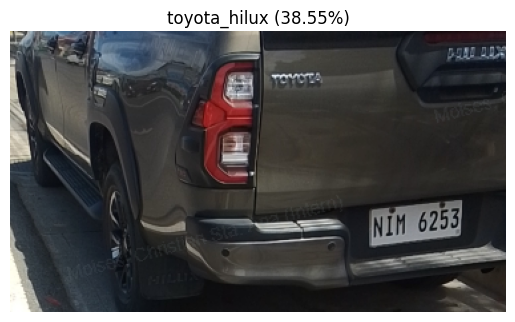

In [ ]:
import torch
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO

# Load trained YOLO classification model
model = YOLO("/content/runs/classify/train2/weights/best.pt")  # Replace with your trained model

# Path to the test image
image_path = "/content/Screenshot 2025-03-31 203049.png"

# Perform classification on the image
results = model(image_path)  # YOLO classifier returns a list of results

# Extract predicted class and confidence
probs = results[0].probs  # Probabilities for all classes
top1_class_id = probs.top1  # ID of the top predicted class
top1_confidence = probs.top1conf  # Confidence score of top prediction
predicted_class = model.names[top1_class_id]  # Get class name from ID

# Print the result
print(f"Predicted Class: {predicted_class}, Confidence: {top1_confidence:.2%}")

# Load and display image with prediction
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis("off")
plt.title(f"{predicted_class} ({top1_confidence:.2%})")
plt.show()
